In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import json
import requests
import datetime as dt

from CP_trend import * #expand_months_manual, findTTT, plot_t0

from pandas.io.json import json_normalize
%load_ext autoreload
%autoreload 2
%load_ext autotime

In [45]:
#read data
price_data = pd.read_csv('df_med_all112619.csv',index_col=0)
search_data = pkl.load(open("./data/search_data_2019-09.pkl", "rb"))
market_data = pd.read_csv('df_cnt_all_112019.csv',index_col=0)

time: 174 ms


In [46]:
price_data.groupby(['Retail Site']).count()['Market Index'].sort_values( )

Retail Site
24 Svres         6
Rue21             6
River Island      6
Revolve           6
Reformation       6
                 ..
ColourPop         6
Club Monaco       6
Christian Dior    6
Fendi             6
melijoe           6
Name: Market Index, Length: 100, dtype: int64

time: 8.07 ms


In [47]:
week_cols = price_data.columns[4:-2]

time: 943 µs


In [48]:
#set trends and trends t0
trends = ['neon', 'paper bag waist', 'one shoulder', 'puff sleeve', 'high waisted jeans', 'animal print']
trends_t0 = [return_t0(t,search_data) for t in trends]

calculating t0 for neon
calculating t0 for paper bag waist
calculating t0 for one shoulder
calculating t0 for puff sleeve
calculating t0 for high waisted jeans
calculating t0 for animal print
time: 200 ms


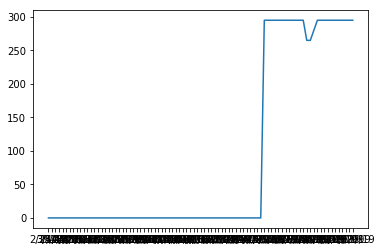

time: 1.33 s


In [49]:
#plot the price curve for Alice Olivia and Paper bag waist
trend1W = '%20'.join(trends[1].split())
imx_ppr = price_data[(price_data['trend'] == trend1W) & (price_data['Retail Site'] == "Alice + Olivia")]
#week_cols = list(imx_ppr.columns[4:-2])
imx_pprT = imx_ppr[week_cols].T
imx_pprT.columns = ['count']

plt.plot(imx_pprT)

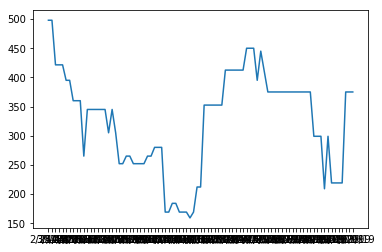

time: 1.37 s


In [50]:
#plot the price curve for Alice Olivia and Paper bag waist
trend1W = '%20'.join(trends[1].split())
imx_ppr = price_data[(price_data['trend'] == trend1W) & (price_data['Retail Site'] == "Intermix")]
#week_cols = list(imx_ppr.columns[4:-2])
imx_pprT = imx_ppr[week_cols].T
imx_pprT.columns = ['count']

plt.plot(imx_pprT)

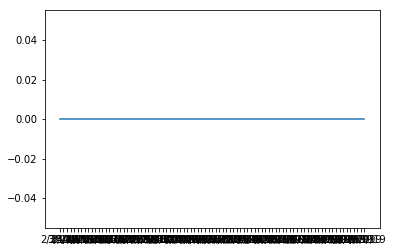

time: 1.33 s


In [51]:
#plot the price curve for Yoox.com and Paper bag waist
trend1W = '%20'.join(trends[1].split())
imx_ppr = price_data[(price_data['trend'] == trend1W) & (price_data['Retail Site'] == "Yoox.com")]
#week_cols = list(imx_ppr.columns[4:-2])
imx_pprT = imx_ppr[week_cols].T
imx_pprT.columns = ['count']

plt.plot(imx_pprT)

trend neon
37
['Alice + Olivia', 'Revolve', 'Shopbop.com', 'Bloomingdales', 'Yoox.com', 'SSense', 'Nordstrom', 'Intermix', 'Torrid', 'Zara', 'Asos', 'Forever 21', 'Boohoo', 'Topshop', 'H&M', 'Rue21', 'Urban Outfitters', 'River Island', 'Next', '24 S\x8fvres', 'Net-a-porter', 'MODA OPERANDI', 'Neiman Marcus', 'Saks Fifth Avenue', 'LUISAVIAROMA', 'Bergdorf Goodman', 'Barneys New York', 'Farfetch', 'Fendi', 'Walmart', "Macy's", 'Kohls', 'JCPenney', 'Target', 'Belk', 'American Eagle', 'J.Crew']
calculating t0 for neon


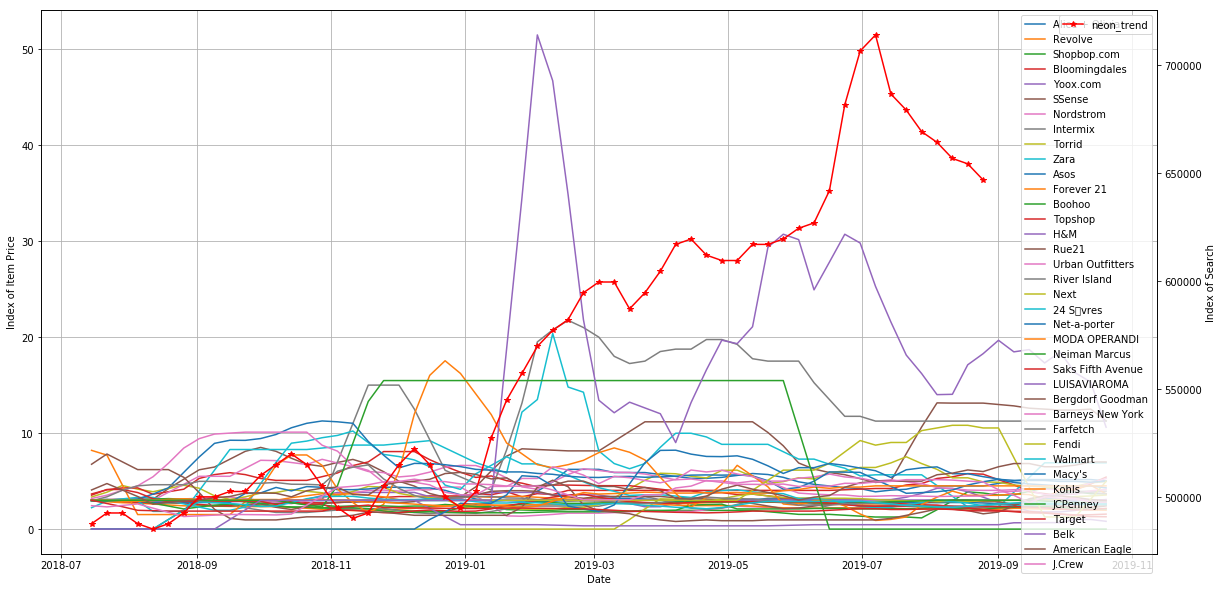

trend paper bag waist
37
['Alice + Olivia', 'Revolve', 'Shopbop.com', 'Bloomingdales', 'Yoox.com', 'SSense', 'Nordstrom', 'Intermix', 'Torrid', 'Zara', 'Asos', 'Forever 21', 'Boohoo', 'Topshop', 'H&M', 'Rue21', 'Urban Outfitters', 'River Island', 'Next', '24 S\x8fvres', 'Net-a-porter', 'MODA OPERANDI', 'Neiman Marcus', 'Saks Fifth Avenue', 'LUISAVIAROMA', 'Bergdorf Goodman', 'Barneys New York', 'Farfetch', 'Fendi', 'Walmart', "Macy's", 'Kohls', 'JCPenney', 'Target', 'Belk', 'American Eagle', 'J.Crew']
calculating t0 for paper bag waist


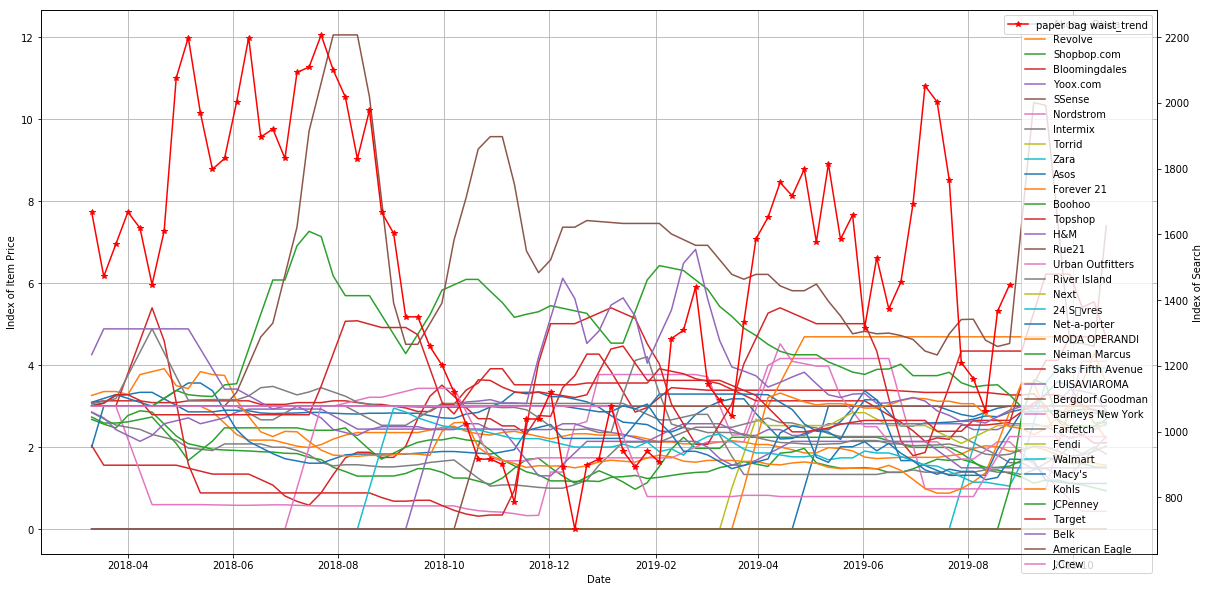

trend one shoulder
37
['Alice + Olivia', 'Revolve', 'Shopbop.com', 'Bloomingdales', 'Yoox.com', 'SSense', 'Nordstrom', 'Intermix', 'Torrid', 'Zara', 'Asos', 'Forever 21', 'Boohoo', 'Topshop', 'H&M', 'Rue21', 'Urban Outfitters', 'River Island', 'Next', '24 S\x8fvres', 'Net-a-porter', 'MODA OPERANDI', 'Neiman Marcus', 'Saks Fifth Avenue', 'LUISAVIAROMA', 'Bergdorf Goodman', 'Barneys New York', 'Farfetch', 'Fendi', 'Walmart', "Macy's", 'Kohls', 'JCPenney', 'Target', 'Belk', 'American Eagle', 'J.Crew']
calculating t0 for one shoulder


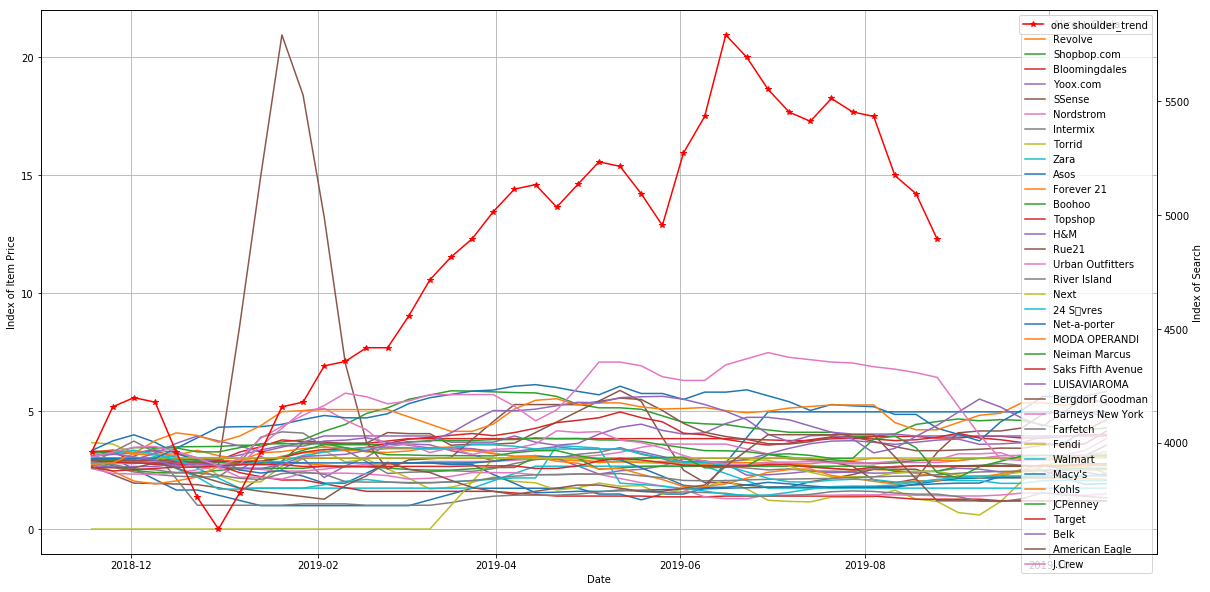

trend puff sleeve
37
['Alice + Olivia', 'Revolve', 'Shopbop.com', 'Bloomingdales', 'Yoox.com', 'SSense', 'Nordstrom', 'Intermix', 'Torrid', 'Zara', 'Asos', 'Forever 21', 'Boohoo', 'Topshop', 'H&M', 'Rue21', 'Urban Outfitters', 'River Island', 'Next', '24 S\x8fvres', 'Net-a-porter', 'MODA OPERANDI', 'Neiman Marcus', 'Saks Fifth Avenue', 'LUISAVIAROMA', 'Bergdorf Goodman', 'Barneys New York', 'Farfetch', 'Fendi', 'Walmart', "Macy's", 'Kohls', 'JCPenney', 'Target', 'Belk', 'American Eagle', 'J.Crew']
calculating t0 for puff sleeve


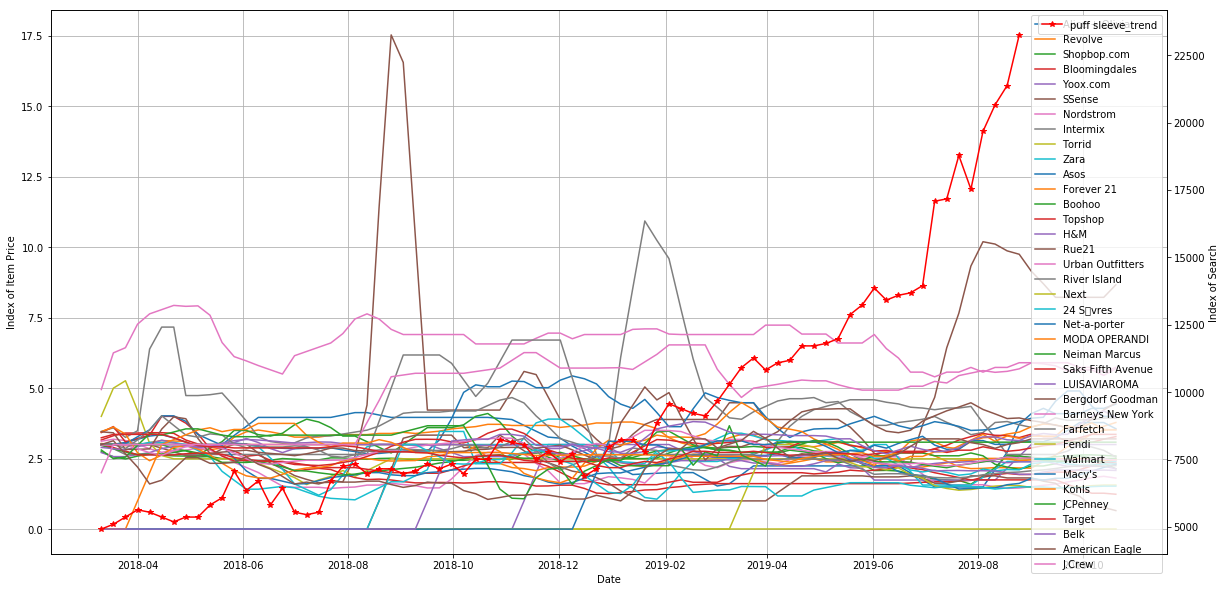

trend high waisted jeans
37
['Alice + Olivia', 'Revolve', 'Shopbop.com', 'Bloomingdales', 'Yoox.com', 'SSense', 'Nordstrom', 'Intermix', 'Torrid', 'Zara', 'Asos', 'Forever 21', 'Boohoo', 'Topshop', 'H&M', 'Rue21', 'Urban Outfitters', 'River Island', 'Next', '24 S\x8fvres', 'Net-a-porter', 'MODA OPERANDI', 'Neiman Marcus', 'Saks Fifth Avenue', 'LUISAVIAROMA', 'Bergdorf Goodman', 'Barneys New York', 'Farfetch', 'Fendi', 'Walmart', "Macy's", 'Kohls', 'JCPenney', 'Target', 'Belk', 'American Eagle', 'J.Crew']
calculating t0 for high waisted jeans


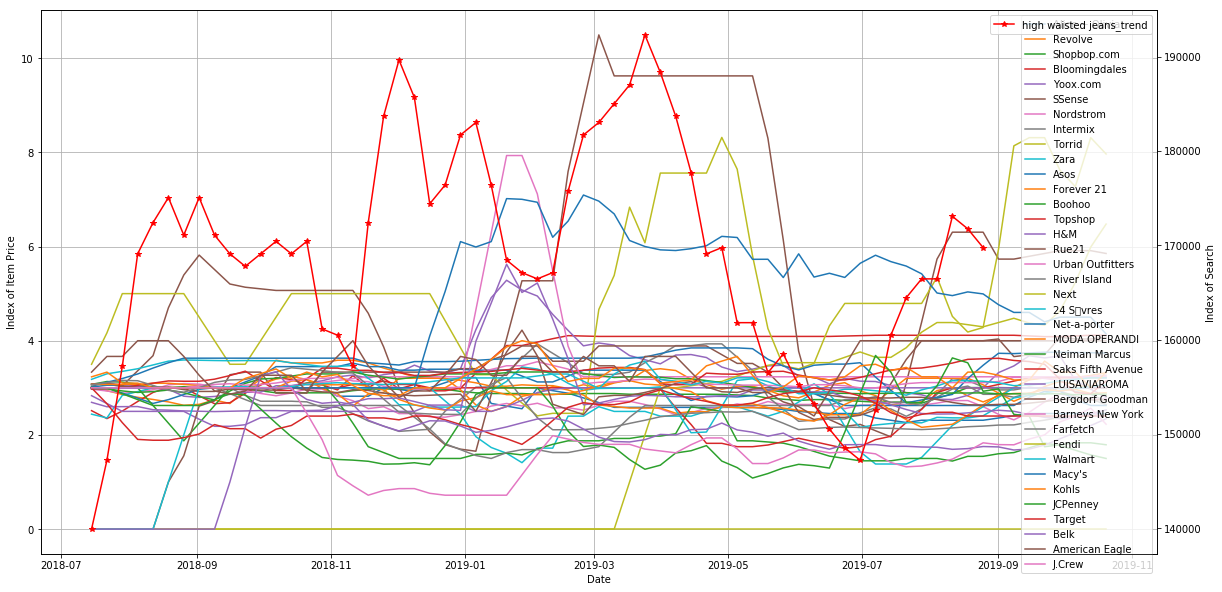

trend animal print
37
['Alice + Olivia', 'Revolve', 'Shopbop.com', 'Bloomingdales', 'Yoox.com', 'SSense', 'Nordstrom', 'Intermix', 'Torrid', 'Zara', 'Asos', 'Forever 21', 'Boohoo', 'Topshop', 'H&M', 'Rue21', 'Urban Outfitters', 'River Island', 'Next', '24 S\x8fvres', 'Net-a-porter', 'MODA OPERANDI', 'Neiman Marcus', 'Saks Fifth Avenue', 'LUISAVIAROMA', 'Bergdorf Goodman', 'Barneys New York', 'Farfetch', 'Fendi', 'Walmart', "Macy's", 'Kohls', 'JCPenney', 'Target', 'Belk', 'American Eagle', 'J.Crew']
calculating t0 for animal print


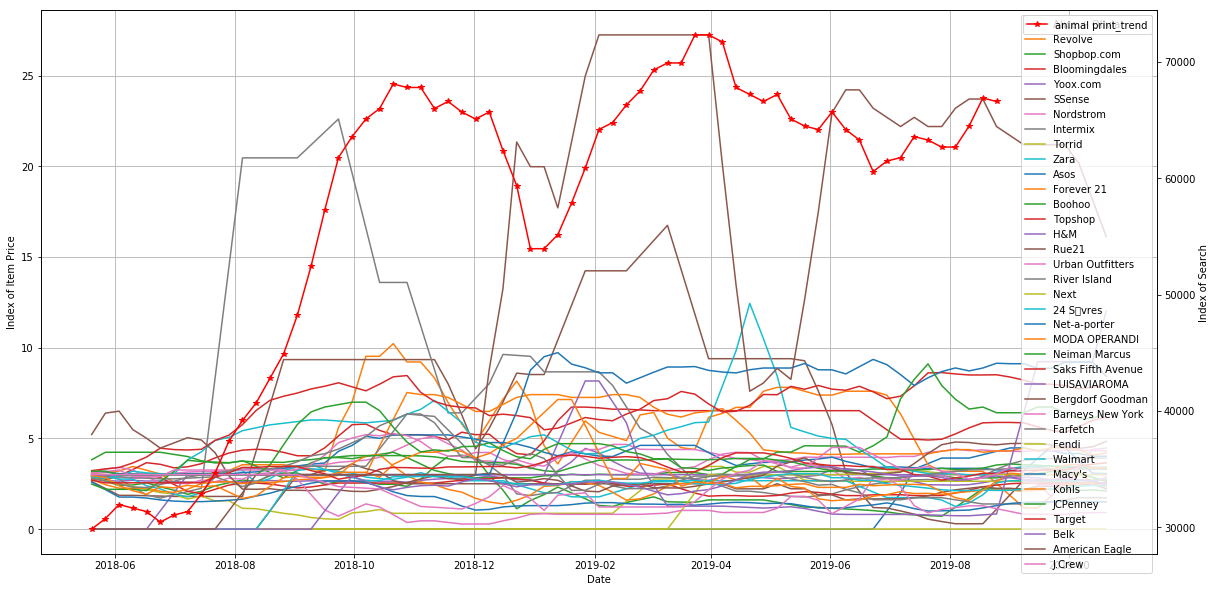

time: 6.75 s


In [54]:
#check multi curve for all retailers with filter
for i in range(len(trends)):
#still use the same retailers filtered by market_data
    print('trend {}'.format(trends[i]))
    all_ret_ = val_retailers(market_data, trends[0])
    print(len(all_ret_))
    print(all_ret_)
    #res1 = getdelta_t0(search_data, market_data, all_ret_ppr, trends[1], trends_t0[1])
    plot_multicurve(search_data, price_data, trends[i], all_ret_, 3, True, False)

In [57]:
trends_t0[0]

'2018-07-22'

time: 2.38 ms


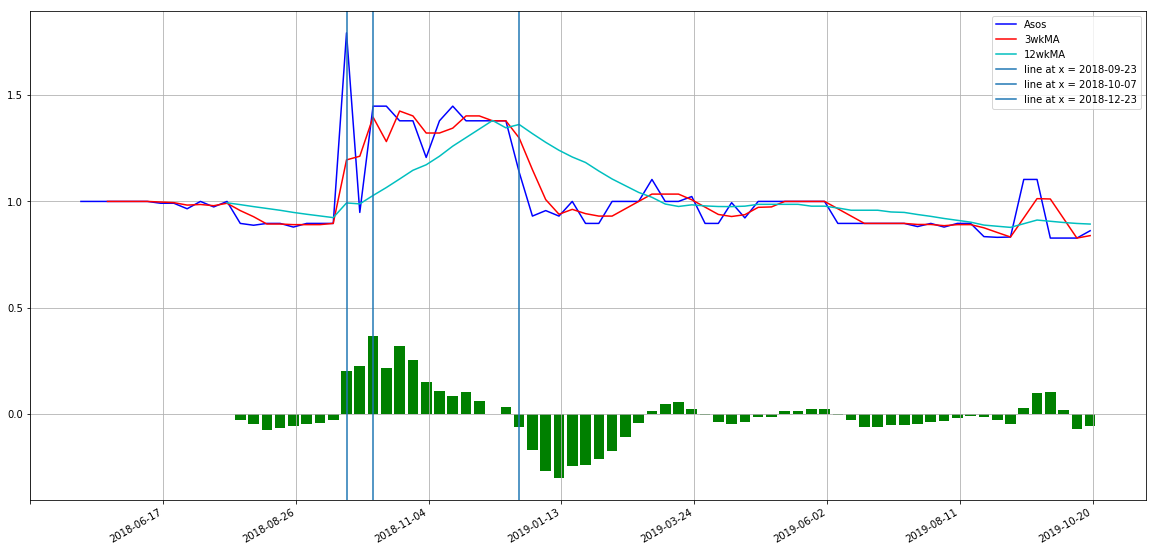

'2018-09-23'

time: 460 ms


In [55]:
plot_t0_ret(price_data, "Asos", 'neon', trends_t0[0], makeplot = True)

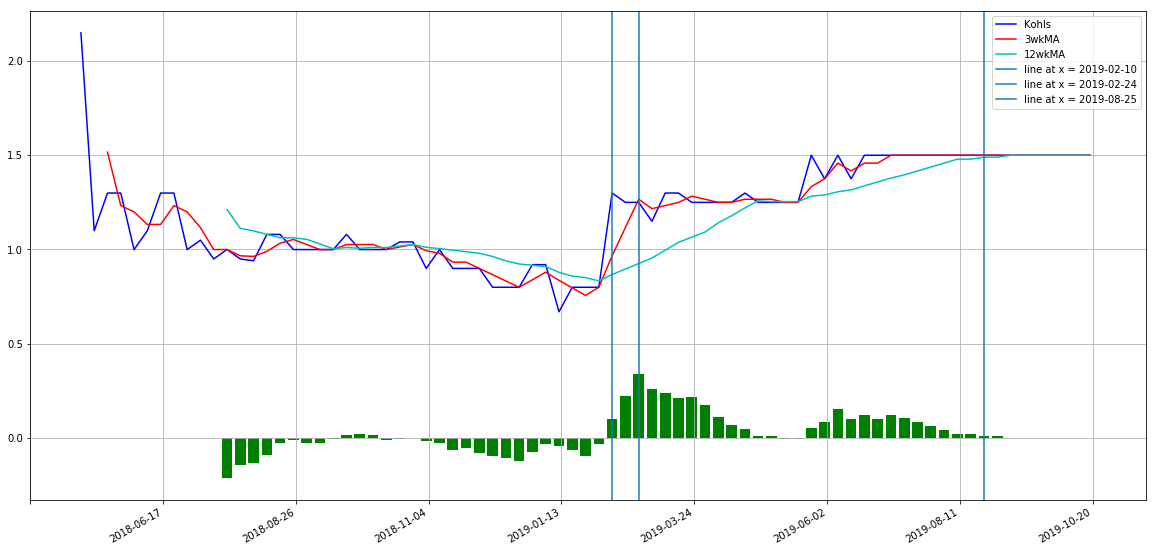

'2019-02-10'

time: 463 ms


In [58]:
plot_t0_ret(price_data, "Kohls", 'neon', trends_t0[0], makeplot = True)

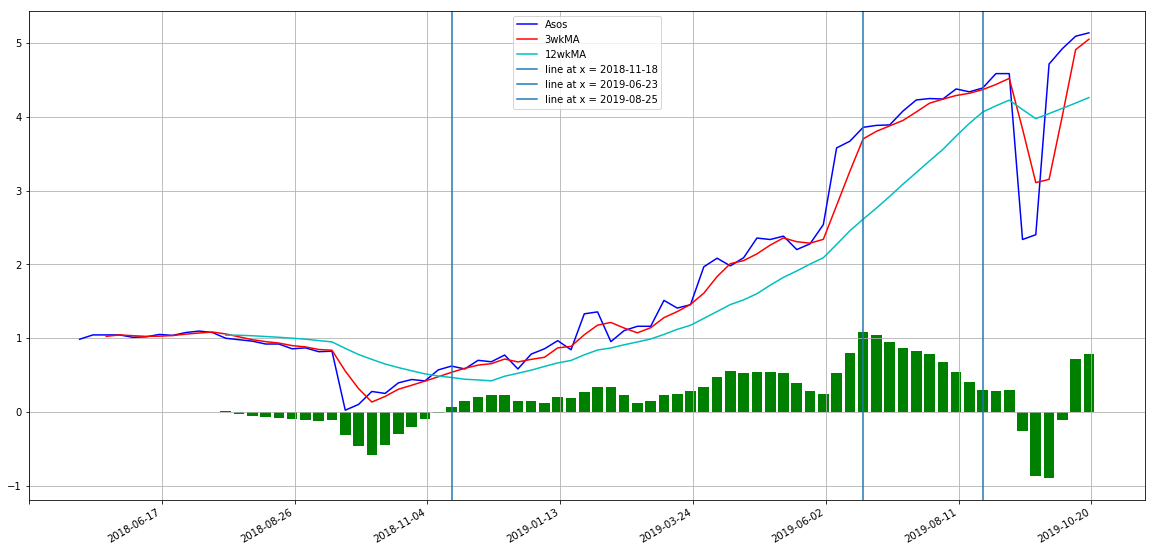

'2018-11-18'

time: 487 ms


In [56]:
plot_t0_ret(market_data, "Asos", 'neon', trends_t0[0], makeplot = True)

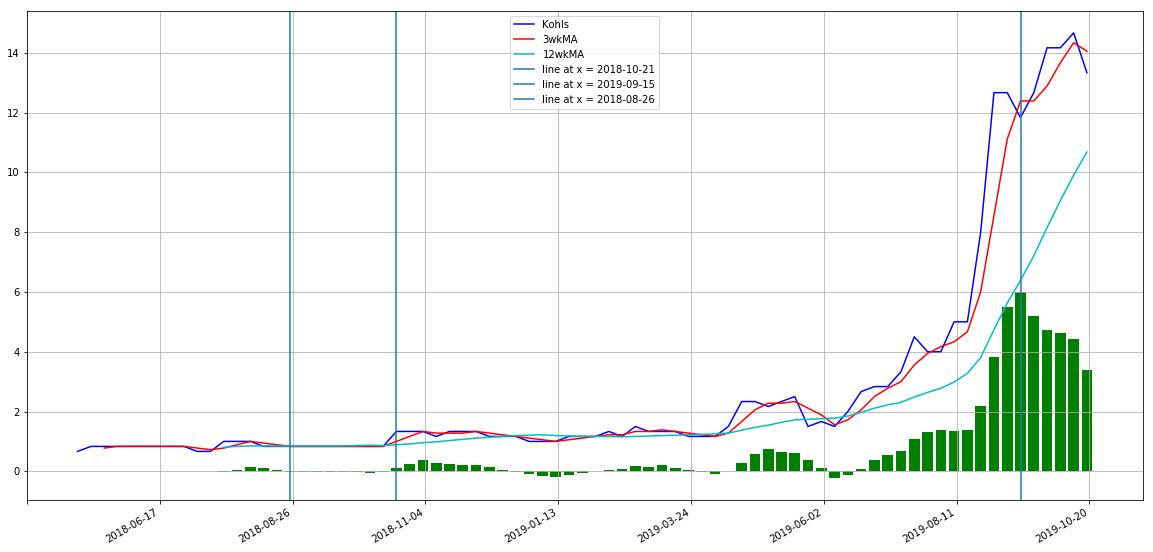

'2018-10-21'

time: 600 ms


In [59]:
plot_t0_ret(market_data, "Kohls", 'neon', trends_t0[0], makeplot = True)